# IGTI - Bootcamp Analista de Machine Learning

    Autor: Leonardo Simões

## Desafio Módulo 2

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [49]:
df = pd.read_csv('winequality-red.csv', sep =';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
df.shape

(1599, 12)

In [51]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [52]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
df['fixed acidity'].std()

1.7410963181277006

In [55]:
df['residual sugar'].median()

2.2

In [56]:
df[['fixed acidity', 'pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


In [57]:
np.corrcoef(df['fixed acidity'].values, df['pH'].values)[0, 1]

-0.6829781945685315

In [58]:
df[['quality', 'alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


In [59]:
df.query('quality == 5').shape[0]

681

In [60]:
X, y = df.drop('quality', axis=1), df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=1)

In [61]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
df['fixed acidity'].min()

4.6

In [63]:
X_train[:,0].min()

0.0

## Algoritmos ML

### Algoritmo KNN:

In [70]:
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
y_pred = clf_KNN.predict(X_test)

In [72]:
print(accuracy_score(y_test, y_pred))

0.5583333333333333


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.33      0.05      0.08        21
           5       0.61      0.71      0.65       207
           6       0.54      0.52      0.53       195
           7       0.38      0.35      0.36        52
           8       0.00      0.00      0.00         3

    accuracy                           0.56       480
   macro avg       0.48      0.35      0.38       480
weighted avg       0.54      0.56      0.54       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
print(confusion_matrix(y_test, y_pred))

[[  1   0   0   1   0   0]
 [  0   1  14   5   1   0]
 [  0   0 147  55   5   0]
 [  0   1  72 101  21   0]
 [  0   1   9  24  18   0]
 [  0   0   0   0   3   0]]


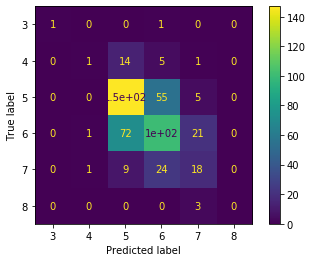

In [75]:
plot_confusion_matrix(clf_KNN, X_test, y_test); 

### Algoritmo Árvore de Decisão:

In [76]:
clf_arvore = DecisionTreeClassifier()
clf_arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
y_pred = clf_arvore.predict(X_test)

In [78]:
print(accuracy_score(y_test, y_pred))

0.5958333333333333


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.24      0.19      0.21        21
           5       0.67      0.70      0.68       207
           6       0.63      0.54      0.58       195
           7       0.41      0.60      0.49        52
           8       0.33      0.33      0.33         3

    accuracy                           0.60       480
   macro avg       0.38      0.39      0.38       480
weighted avg       0.60      0.60      0.60       480



In [80]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   0   2   0   0]
 [  1   4   9   4   3   0]
 [  1   8 144  40  14   0]
 [  0   5  59 106  25   0]
 [  0   0   3  16  31   2]
 [  0   0   0   0   2   1]]


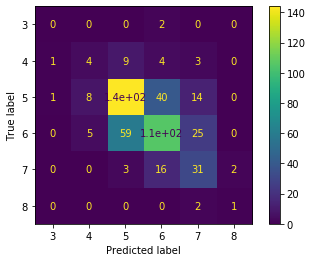

In [81]:
plot_confusion_matrix(clf_arvore, X_test, y_test); 

### Algoritmo Floresta Randômica

In [82]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [83]:
y_pred = clf_floresta.predict(X_test)

In [84]:
print(accuracy_score(y_test, y_pred))

0.6770833333333334


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.71      0.81      0.76       207
           6       0.66      0.69      0.68       195
           7       0.57      0.44      0.50        52
           8       0.00      0.00      0.00         3

    accuracy                           0.68       480
   macro avg       0.32      0.32      0.32       480
weighted avg       0.64      0.68      0.65       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   2   0   0   0]
 [  0   0  14   7   0   0]
 [  0   0 167  38   2   0]
 [  0   0  47 135  13   0]
 [  0   0   5  24  23   0]
 [  0   0   0   1   2   0]]


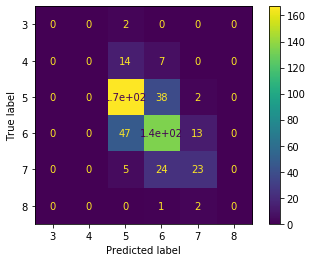

In [87]:
plot_confusion_matrix(clf_floresta, X_test, y_test); 

### Algoritmo SVM:

In [88]:
clf_svm=SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
y_pred = clf_svm.predict(X_test)

In [90]:
print(accuracy_score(y_test, y_pred))

0.5833333333333334


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.60      0.86      0.71       207
           6       0.55      0.53      0.54       195
           7       0.00      0.00      0.00        52
           8       0.00      0.00      0.00         3

    accuracy                           0.58       480
   macro avg       0.19      0.23      0.21       480
weighted avg       0.48      0.58      0.52       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   2   0   0   0]
 [  0   0  16   5   0   0]
 [  0   0 177  30   0   0]
 [  0   0  92 103   0   0]
 [  0   0   6  46   0   0]
 [  0   0   0   3   0   0]]


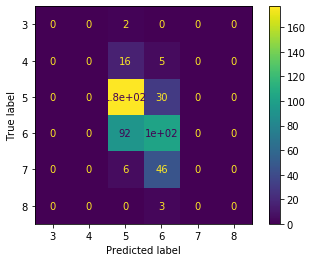

In [93]:
plot_confusion_matrix(clf_svm, X_test, y_test); 

### Algoritmo Rede MLP

In [94]:
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)
clf_mlp.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [95]:
y_pred = clf_mlp.predict(X_test)

In [96]:
print(accuracy_score(y_test, y_pred))

0.5979166666666667


In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        21
           5       0.63      0.79      0.70       207
           6       0.57      0.57      0.57       195
           7       0.46      0.23      0.31        52
           8       0.00      0.00      0.00         3

    accuracy                           0.60       480
   macro avg       0.28      0.27      0.26       480
weighted avg       0.55      0.60      0.57       480



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   2   0   0   0]
 [  0   0  15   5   1   0]
 [  0   0 164  43   0   0]
 [  0   0  73 111  11   0]
 [  0   0   5  35  12   0]
 [  0   0   0   1   2   0]]


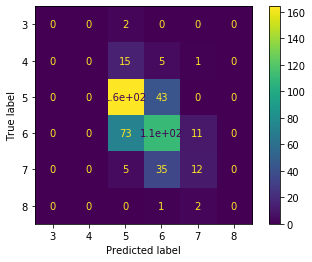

In [99]:
plot_confusion_matrix(clf_mlp, X_test, y_test); 

### Floresta Randômica 2

Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). 

Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset? 

In [101]:
df['good_quality'] = 1
df.loc[df.quality <= 5, 'good_quality'] = 0
df['good_quality'].value_counts()

1    855
0    744
Name: good_quality, dtype: int64

In [106]:
X, y = df.drop(columns=['good_quality', 'quality']), df['good_quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=1)

In [107]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [108]:
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [109]:
y_pred = clf_floresta.predict(X_test)

In [110]:
print(accuracy_score(y_test, y_pred))

0.8041666666666667
